
... ***CURRENTLY UNDER DEVELOPMENT*** ...


## Obtain probabilites of changing category between radiuses based on Nakajo tracks

inputs required: 
  * Nakajo tracks
  
in this notebook:
  * matrix of probabilites of change

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit 
from teslakit.database import Database
from teslakit.storms import Extract_Circle, GetCategoryChangeProbs

from teslakit.plotting.storms import Plot_Category_Change



## Database and Site parameters

In [2]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/albacid/Projects/TeslaKit_projects'
db = Database(p_data)

# set site
db.SetSite('KWAJALEIN_emulator')


In [3]:
# --------------------------------------
# load data and set parameters

TCs_Nakajo = db.Load_TCs_Nakajo()  # Nakajo simulations

# wave point longitude and latitude
pnt_lon = 167.73
pnt_lat = 8.72

# radius for TCs selection (º)
r1 = 14
r2 = 4


## Synthetic TCs - Category Change Probabilities

In [4]:
# --------------------------------------
# Select Nakajo TCs inside circle

# dictionary with needed variable names
d_vns = {
    'longitude':'ylon_TC',
    'latitude':'ylat_TC',
    'time': 'yts',
    'pressure':'yCPRES',
}

# Extract TCs inside R=14 and positions
_, TCs_r1 = Extract_Circle(TCs_Nakajo, pnt_lon, pnt_lat, r1, d_vns)
print(TCs_r1)

# Extract TCs inside R=4 and positions
_, TCs_r2 = Extract_Circle(TCs_Nakajo, pnt_lon, pnt_lat, r2, d_vns)
print(TCs_r2)


<xarray.Dataset>
Dimensions:        (storm: 59450)
Coordinates:
  * storm          (storm) int64 5 8 14 50 52 ... 999974 999982 999986 999990
Data variables:
    pressure_min   (storm) float64 983.7 933.8 970.6 978.9 ... 969.8 975.2 995.9
    pressure_mean  (storm) float64 988.7 971.4 992.9 991.0 ... 990.9 996.3 1e+03
    velocity_mean  (storm) float64 175.9 11.68 23.52 53.67 ... 11.77 19.58 9.389
    gamma          (storm) float64 114.5 167.8 73.57 60.64 ... 142.4 117.3 119.6
    delta          (storm) float64 109.8 226.5 22.0 22.34 ... 152.5 128.8 110.2
    category       (storm) int64 1 4 2 2 1 0 0 0 1 5 1 ... 0 4 0 1 1 1 4 0 2 2 1
    dmin_date      (storm) float64 45.4 54.0 42.0 264.0 9.0 ... 4.5 0.0 18.0 0.0
    last_date      (storm) float64 54.4 288.0 259.5 400.5 ... 150.0 259.5 177.0
    index_in       (storm) int64 61 0 2 91 0 0 5 7 0 31 ... 6 0 0 0 0 0 0 0 0 0
    index_out      (storm) int64 85 38 30 109 18 14 31 ... 24 16 26 9 35 29 15
Attributes:
    point_lon:  167.73
  

In [5]:
# --------------------------------------
# Calculate Syntethic TCs category change probabilities

categ_cp = GetCategoryChangeProbs(TCs_r1, TCs_r2)
print(categ_cp)

db.Save_TCs_probs_synth(categ_cp)


<xarray.Dataset>
Dimensions:                  (category: 6)
Coordinates:
  * category                 (category) int64 0 1 2 3 4 5
Data variables:
    category_change_count    (category, category) int64 1790 1355 261 ... 0 234
    category_change_probs    (category, category) float64 0.08349 ... 0.1024
    category_nochange_probs  (category) float64 0.9165 0.8701 ... 0.4208 0.4271
    category_change_cumsum   (category, category) float64 0.08349 ... 0.5729


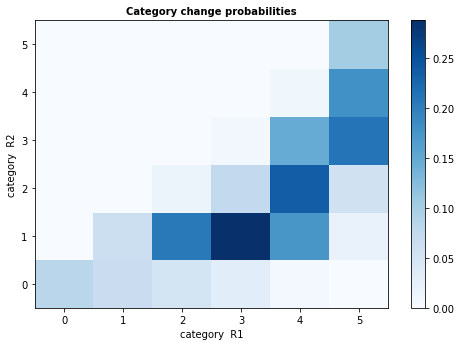

In [6]:
# plot category change probabilities

Plot_Category_Change(categ_cp);
